# BE DAURADE
## Analyse de données Daurade

Jules BERHAULT FISE2021

### Importatitions

In [40]:
import numpy as np
import PIL.Image as Image
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import osm_ui as osm_ui
import ins_utils as ins_utils
d = np.load("Daurade_20141203.npz")
g = np.load("Gaps_20141203.npz")

### Trajectoire générale

1.

2.

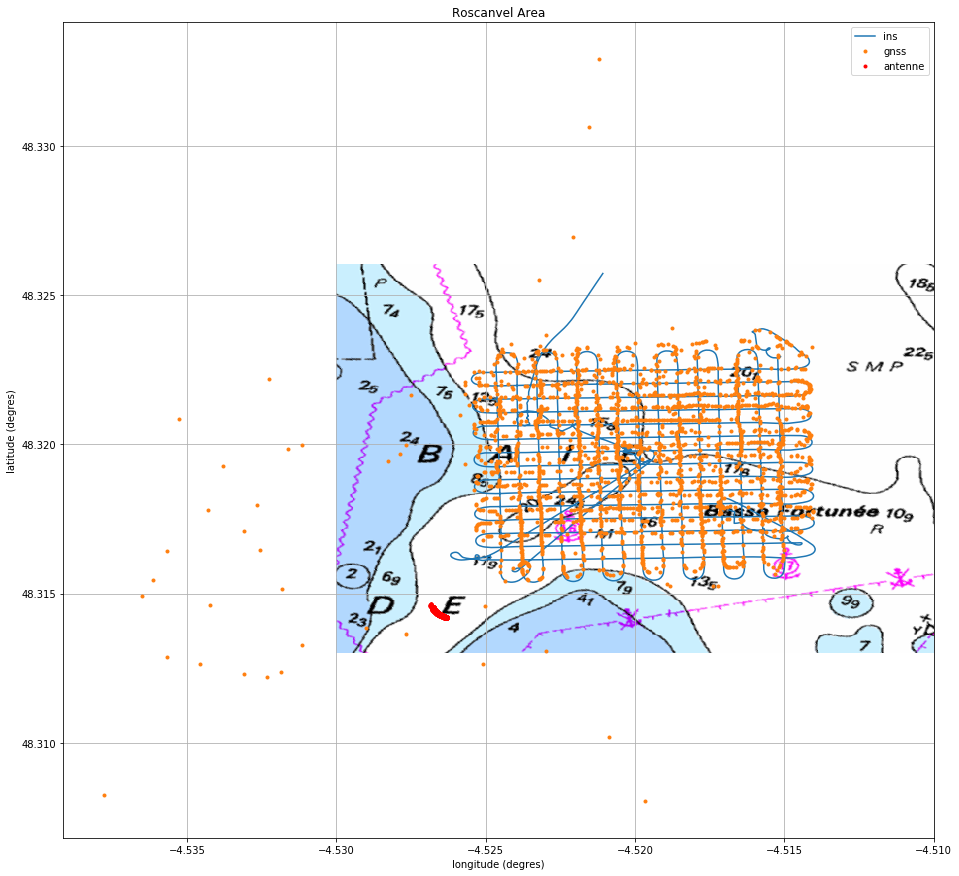

In [41]:
rade = Image.open("Roscanvel_area.tiff")
plt.rcParams['figure.figsize'] = [20, 15]
axes = osm_ui.plot_map(rade, (-4.530, -4.510), (48.313, 48.326), "Roscanvel Area")
lon_gnss = g["x_gaps"][:,0] * 180 / np.pi
lat_gnss = g["x_gaps"][:,1] * 180 / np.pi
lon_gaps = g["x_gaps_gaps"][:,0] * 180 / np.pi
lat_gaps = g["x_gaps_gaps"][:,1] * 180 / np.pi
lon_ins = d["lonlath_ins"][:,0] * 180 / np.pi
lat_ins = d["lonlath_ins"][:,1] * 180 / np.pi
osm_ui.plot_xy_add(axes,lon_ins,lat_ins)
osm_ui.plot_xy_add(axes,lon_gnss,lat_gnss,symbol='.')
osm_ui.plot_xy_add(axes,lon_gaps,lat_gaps,symbol='r.')
axes.legend(("ins", "gnss","antenne"))
plt.show()

3.

Le GPS n’est disponible qu’en un certain nombre de points (points représentés en rouge sur la figure ci dessous) car une fois immergé à une certaine profondeur, un gnss est incapable de recevoir les données de localisation satelites puisque l'eau agît comme une barrière avec les OEM.

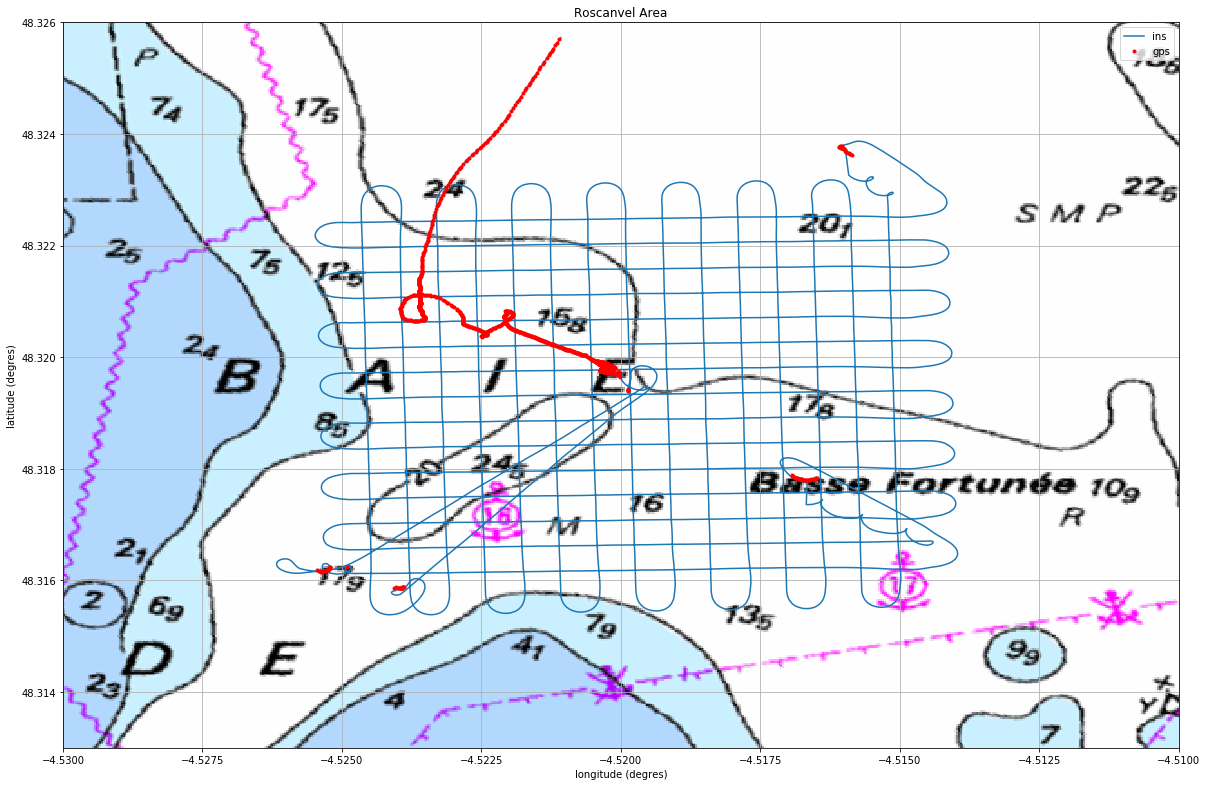

In [42]:
plt.rcParams['figure.figsize'] = [20, 15]
axes = osm_ui.plot_map(rade, (-4.530, -4.510), (48.313, 48.326), "Roscanvel Area")
lon_gps = d["lonlat_gnss"][:,0] * 180 / np.pi
lat_gps = d["lonlat_gnss"][:,1] * 180 / np.pi
lon_ins = d["lonlath_ins"][:,0] * 180 / np.pi
lat_ins = d["lonlath_ins"][:,1] * 180 / np.pi
osm_ui.plot_xy_add(axes,lon_ins,lat_ins)
osm_ui.plot_xy_add(axes,lon_gps,lat_gps,'r.')
axes.legend(("ins","gps"))
plt.show()

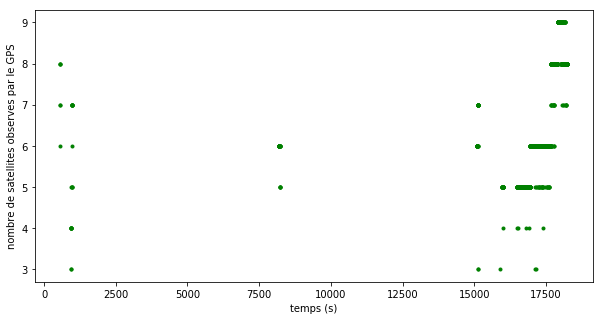

In [43]:
t_gnss = d["t_gnss"]
sat_gnss = d["sat_gnss"]
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(t_gnss,sat_gnss,'g.')
plt.xlabel('temps (s)')
plt.ylabel('nombre de satellites observes par le GPS')
plt.show()

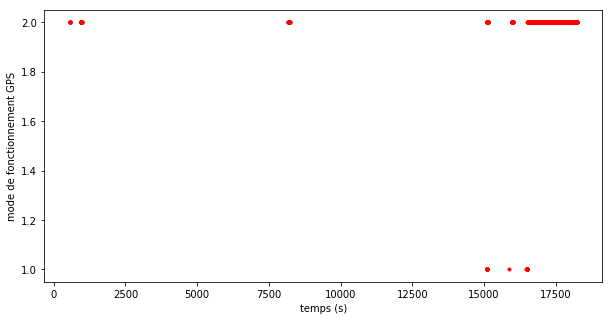

In [44]:
q_gnss = d["quality_gnss"]
plt.plot(t_gnss,q_gnss,'r.')
plt.xlabel('temps (s)')
plt.ylabel('mode de fonctionnement GPS')
plt.show()

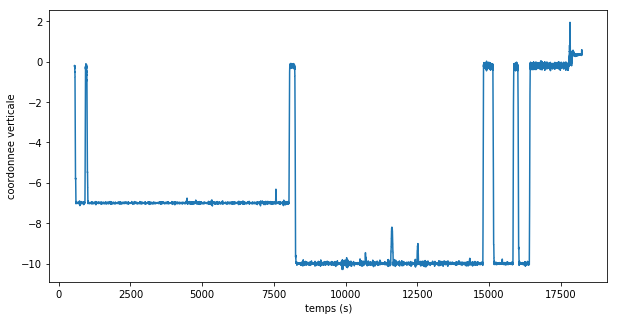

In [45]:
t_ins = d["t_ins"]
h_ins = d["lonlath_ins"][:,2]
plt.plot(t_ins,h_ins)
plt.xlabel('temps (s)')
plt.ylabel('coordonnee verticale')
plt.show()

3.

Les deux premières figures ci-dessus (tracés vert et rouge) représentent respectivement le nombre de satellites observés par le GPS ainsi que le mode de fonctionnement du GPS Daurade. On remarque que entre t=1000s et t=15000s, le GPS ne recoit aucune données GPS sauf en t=8000s l'espace d'un instant.

Celà s'explique par le fait que Daurade est immergé pendant cette période comme on peut le voir sur la dernière figure (tracé bleu). Le GPS qu'il embarque est donc incapable de fournir sa localisation GNSS.


4.

Description des phases

• phase 1 : Daurade en surface paré à plonger

• phase 2 : Daurade immergé à 7m de profondeur effectuant boustrophédon

• phase 3 : Daurade immergé à 10m de profondeur effectuant boustrophédon perpendiculaire

• phase 4 : Retour à la surface

• phase 5 : Plongée à 10m

• phase 6 : Daurade en surface, retour à la base

### Référence verticale

Voici la trajectoire vertivale de Daurade en sortie du filtre :

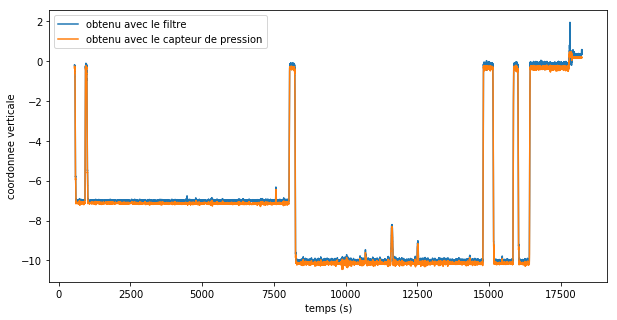

In [46]:
t_ins = d["t_ins"]
h_ins = d["lonlath_ins"][:,2]
t_pre = d["t_pressure"]
h_dpre = d["depth_pressure"]
plt.plot(t_ins,h_ins)
plt.plot(t_pre,[ -x for x in h_dpre])
plt.xlabel('temps (s)')
plt.ylabel('coordonnee verticale')
plt.legend(("obtenu avec le filtre","obtenu avec le capteur de pression"))
plt.show()

5.

Le zéro de la position verticale correspond sûrement à la première mesure de coordonnée verticale lorsque Daurade est à la surface de l'eau et qu'il n'est pas immergé. En mer l'altitude nulle correspond à la surface de l'eau.

6.

Malheureusement, il est assez risqué de se fier à la première mesure comme référence car sur une période donnée, les erreurs de mesure s'accumulent au fur et à mesure que la marée change et il devient difficile d'obtenir des données vraiment fiables sur une longue durée.
Il aurait fallu aussi calibrer le capteur de pression à chaque retour à la surface afin de minimiser au maximum les erreurs de mesure.

7.

D'après les données du SHOM, entre 9h50 et 14h45 le 3 décembre 2014, la marée était globalement montante, ce qui induit des erreurs de mesure de plus de 3m

8.

Il est possible que Daurade ait voulu tenté d'éviter un obstacle au fond de l'eau en remontant légèrement de 2m (de 10m à 8m)

### Précision de navigation horizontale

9.

Lorsque Daurade refait surface, le GPS recoit de nouveau des données de localisation, le GPS n'étant pas calibré et ne disposant pas de paramètres pouvant minimiser les erreurs (latitude, altitude, HDOP, etc.), les valeurs obtenus manquent de précision et s'améliore au fur et à mesure que le temps passe.

10.

A la fin de la phase 2 on observe un saut de

In [47]:
4249000 * np.pi * (-0.078882 + 0.078823) / 180

-4.375383355116335

mètres en longitude

A la fin de la phase 3 on observe un saut de

In [48]:
4249000 * np.pi * (-0.078823 + 0.078827) / 180

0.29663615966822376

mètres en longitude

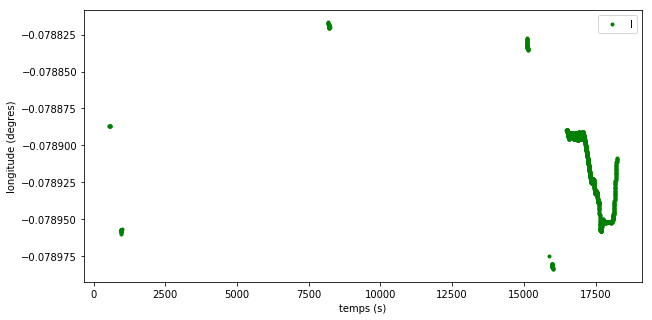

In [49]:
t_gnss = d["t_gnss"]
lon_gnss = d["lonlat_gnss"][:,0]
plt.plot(t_gnss,lon_gnss,'g.')
plt.xlabel('temps (s)')
plt.ylabel('longitude (degres)')
plt.legend(("longitude"))
plt.show()

A la fin de la phase 2 on observe un saut de

In [50]:
6371000 * np.pi * (0.843275 - 0.843423) / 180

-16.456849143398806

mètres en latitude

A la fin de la phase 3 on observe un saut de

In [51]:
6371000 * np.pi * (0.843423 - 0.843300) / 180

13.676975977278971

mètres en latitude

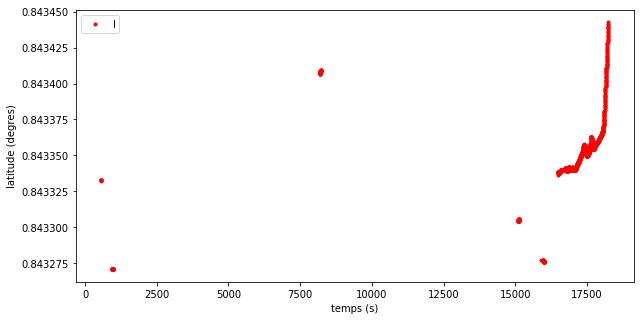

In [52]:
t_gnss = d["t_gnss"]
lat_gnss = d["lonlat_gnss"][:,1]
plt.plot(t_gnss,lat_gnss,'r.')
plt.xlabel('temps (s)')
plt.ylabel('latitude (degres)')
plt.legend(("latitude"))
plt.show()

11.

12.

### Qualité de la mesure de vitesse

13.

Méthode d'intégration trapésoïdale :

$x(t_f) = x(t_0) + \frac{v(t_f)-v(t_0)}{n} * (\frac{v(t_0)+v(t_f)}{2} + \sum_{i=1}^{n-1} v(t_i))$

$x(t_f) = x(t_0) + h * (\frac{v(t_0)+v(t_f)}{2} + \sum_{i=1}^{n-1} v(t_i))$

14. 

Premier survey :
Position estimée par le DVL

[[ -0.07888512   0.84333941  -7.01      ]
 [ -0.07888509   0.84333941  -7.05016833]
 [ -0.07888505   0.84333941  -7.09025194]
 ..., 
 [ -0.07874638   0.8434773  -11.56088209]
 [ -0.07874635   0.84347732 -11.52878211]
 [ -0.07874631   0.84347734 -11.45392228]]


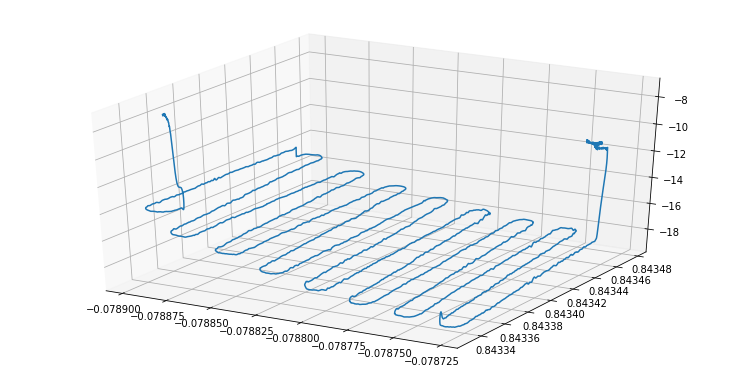

In [53]:
t_dvl = d["t_dvl"]
speed_dvl = d["speed_dvl_ned"]
lonlath0 = d["lonlath_ins"][980]
lonlath_dvl_0 = ins_utils.dvl_integration(t_dvl[980:18789], speed_dvl[980:18789], lonlath0)
print(lonlath_dvl_0)

fig = plt.figure()
ax = Axes3D(fig)
x, y, z = lonlath_dvl_0[:,0], lonlath_dvl_0[:,1], lonlath_dvl_0[:,2]
ax.plot(x, y, z)

Second survey :
Position estimée par le DVL

[[ -0.07897002   0.84338472  -7.05      ]
 [ -0.07897005   0.84338474  -7.04138996]
 [ -0.07897008   0.84338477  -7.08267489]
 ..., 
 [ -0.07898601   0.84328234 -16.79180939]
 [ -0.07898608   0.84328237 -16.90313902]
 [ -0.07898614   0.84328241 -16.96179599]]


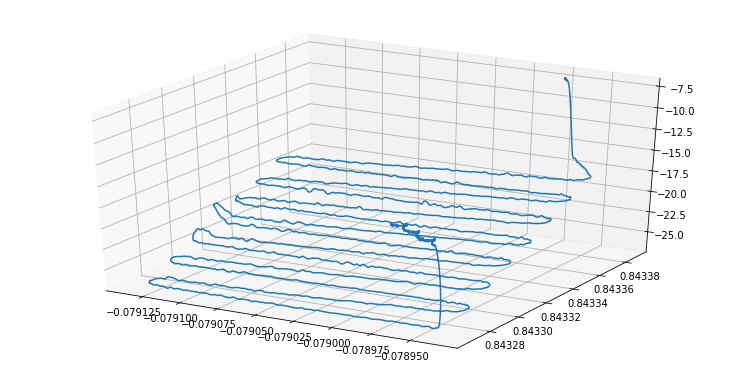

In [54]:
t_dvl = d["t_dvl"]
speed_dvl = d["speed_dvl_ned"]
lonlath0 = d["lonlath_ins"][18740]
lonlath_dvl_1 = ins_utils.dvl_integration(t_dvl[18740:35607], speed_dvl[18740:35607], lonlath0)
print(lonlath_dvl_1)

fig = plt.figure()
ax = Axes3D(fig)
x, y, z = lonlath_dvl_1[:,0], lonlath_dvl_1[:,1], lonlath_dvl_1[:,2]
ax.plot(x, y, z)

### Exploitation des données USBL

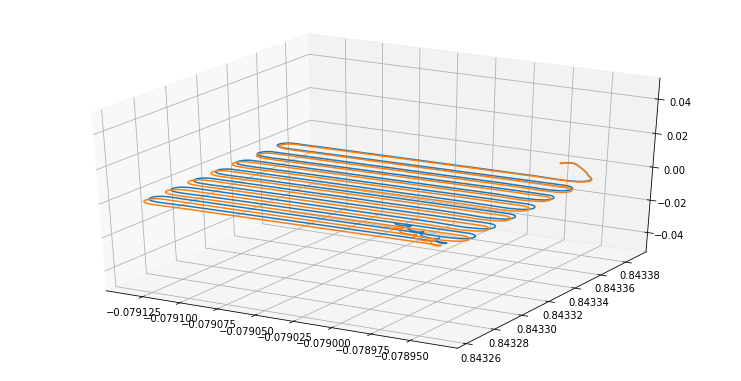

In [55]:
t_ins = d["t_ins"]
t_dvl = d["t_dvl"]
speed_ins = d["speed_ned_ins"]
speed_dvl = d["speed_dvl_ned"]
lonlath0 = d["lonlath_ins"][18740]
lonlath_dvl = ins_utils.dvl_integration(t_dvl[18740:35607], speed_dvl[18740:35607], lonlath0)
lonlath_ins = ins_utils.dvl_integration(t_ins[152959:291557], speed_ins[152959:291557], lonlath0)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(lonlath_dvl[:,0], lonlath_dvl[:,1])
ax.plot(lonlath_ins[:,0], lonlath_ins[:,1])

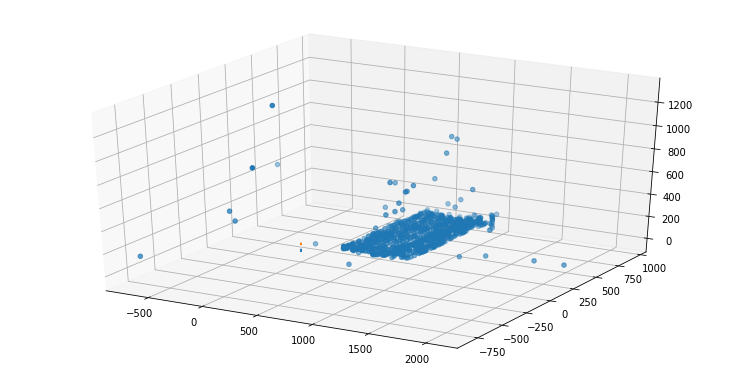

In [56]:
t_usbl = g["t_gaps"]
t_ins = d["t_ins"]
t_dvl = d["t_dvl"]
speed_ins = d["speed_ned_ins"]
speed_dvl = d["speed_dvl_ned"]
lonlath0 = d["lonlath_ins"][18740]
lonlath_usbl = g["x_ned_gaps"]
lonlath_dvl = ins_utils.dvl_integration(t_dvl[18740:35607], speed_dvl[18740:35607], lonlath0)
lonlath_ins = ins_utils.dvl_integration(t_ins[152959:291557], speed_ins[152959:291557], lonlath0)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(lonlath_usbl[1236:2302:,0], lonlath_usbl[1236:2302:,1], lonlath_usbl[1236:2302:,2])
ax.plot(lonlath_dvl[:,0], lonlath_dvl[:,1], lonlath_dvl[:,2])
ax.plot(lonlath_ins[:,0], lonlath_ins[:,1], lonlath_ins[:,2])

15. 

Etant donné que ce BE sert a nous presenter l'interêt de l'intégration d'un DVL pour minimiser les erreurs de positionnement, on peut en déduire que l'estimation du DVL seul est plus précis que l'estimation par un filtre de Kalman.

On peut aussi remarquer sur la seconde figure que l'USBL est loin d'être précis mais une fois les données filtrées il peut être un capteur de position pertinant pour recalibrer la centrale et le DVL.